'A' --> 'G'
Distancia mínima: A > C > E > G -> 600
Mayor ancho de banda: A > B > D > F > G -> 950mb
El camino más corto: A > C > E > G -> 3 routers


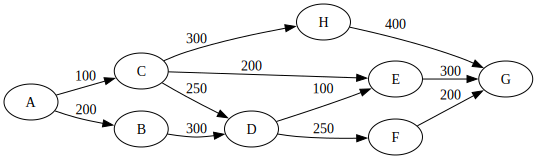

In [17]:
from graphviz import Digraph
from collections import deque
from IPython.display import display

def distancia_minima(grafo, inicio):
    """Encuentra la distancia mínima desde un nodo inicio usando el algoritmo de Dijkstra"""
    repr = {nodo: (float('inf'), []) for nodo in grafo}
    repr[inicio] = (0, [inicio])
    no_visitados = set(grafo)

    while no_visitados:
        # Seleccionar el nodo con la distancia mínima
        nodo_min = min(no_visitados, key=lambda nodo: repr[nodo][0])
        no_visitados.remove(nodo_min)

        for conector, peso in grafo[nodo_min].items():
            if conector in no_visitados:
                nueva_distancia = repr[nodo_min][0] + peso
                if nueva_distancia < repr[conector][0]:  # Actualizamos solo si es menor la distancia
                    repr[conector] = (nueva_distancia, repr[nodo_min][1] + [conector])
    return repr

def distancia_maxima(grafo, inicio):
    repr = {nodo: (float('-inf'), []) for nodo in grafo}
    repr[inicio] = (0, [inicio])
    no_visitados = set(grafo)

    while no_visitados:
        nodo_max = max(no_visitados, key=lambda nodo: repr[nodo][0])
        no_visitados.remove(nodo_max)

        for conector, peso in grafo[nodo_max].items():
            if conector in no_visitados: #---------------------------------------------------
                nueva_distancia = repr[nodo_max][0] + peso
                if nueva_distancia > repr[conector][0]: #Actualizamos solo si es mayor el ancho de banda
                    repr[conector] = (nueva_distancia, repr[nodo_max][1] + [conector])
    return repr

def routers(grafo, inicio, fin):
    cola = deque([(inicio, [inicio])])
    visitados = set()

    while cola:
        actual, camino = cola.popleft()
        if actual == fin: #Fin
            return camino

        for vecino in grafo[actual]: #
            if vecino not in visitados:
                visitados.add(vecino)
                cola.append((vecino, camino + [vecino]))

if __name__ == "__main__":

    grafo = {
        'A': {'B': 200, 'C': 100},
        'B': {'D': 300},
        'C': {'D': 250, 'E': 200, 'H': 300},
        'D': {'E': 100, 'F': 250},
        'E': {'G': 300},
        'F': {'G': 200},
        'H': {'G': 400},
        'G': {}
    }

    distancia_min = distancia_minima(grafo, 'A')
    distancia_max = distancia_maxima(grafo, 'A')
    cant_routers = routers(grafo, 'A', 'G')
    
    print("'A' --> 'G'")
    print(f"Distancia mínima: {' > '.join(distancia_min['G'][1])} -> {distancia_min['G'][0]}")
    print(f"Mayor ancho de banda: {' > '.join(distancia_max['G'][1])} -> {distancia_max['G'][0]}mb")
    print(f"El camino más corto: {' > '.join(cant_routers)} -> {len(cant_routers) - 1} routers")
    
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    for nodo, conectores in grafo.items():
        dot.node(nodo)
        for conector, peso in conectores.items():
            dot.edge(nodo, conector, label=str(peso))


    display(dot)

In [13]:
import time
import tracemalloc
import psutil
import os
from memory_profiler import profile
import matplotlib.pyplot as plt

def medir_rendimiento(func, *args, **kwargs):
    """Función para medir tiempo de ejecución y uso de memoria"""
    
    # Iniciar medición de memoria
    tracemalloc.start()
    
    # Medir memoria del proceso antes
    process = psutil.Process(os.getpid())
    memoria_antes = process.memory_info().rss / 1024 / 1024  # MB
    
    # Medir tiempo de ejecución
    inicio = time.time()
    resultado = func(*args, **kwargs)
    fin = time.time()
    
    # Obtener el pico de uso de memoria
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    # Medir memoria del proceso después
    memoria_despues = process.memory_info().rss / 1024 / 1024  # MB
    
    estadisticas = {
        'tiempo_ejecucion': fin - inicio,
        'memoria_pico': peak / 1024 / 1024,  # MB
        'memoria_actual': current / 1024 / 1024,  # MB
        'memoria_proceso_antes': memoria_antes,
        'memoria_proceso_despues': memoria_despues,
        'diferencia_memoria_proceso': memoria_despues - memoria_antes,
        'resultado': resultado
    }
    
    return estadisticas

# Función para generar un grafo más grande para pruebas de rendimiento
def generar_grafo_grande(tamaño):
    """Genera un grafo aleatorio de mayor tamaño para pruebas de rendimiento"""
    import random
    grafo_grande = {}
    
    for i in range(tamaño):
        nodo = f'N{i}'
        grafo_grande[nodo] = {}
        
        # Conectar con algunos nodos aleatorios
        num_conexiones = random.randint(1, min(5, tamaño-1))
        for _ in range(num_conexiones):
            destino = f'N{random.randint(0, tamaño-1)}'
            if destino != nodo:
                peso = random.randint(50, 500)
                grafo_grande[nodo][destino] = peso
    
    return grafo_grande

In [14]:
# Pruebas de rendimiento para Dijkstra

print("=== ANÁLISIS DE RENDIMIENTO Y MEMORIA - DIJKSTRA ===\n")

# Probar con el grafo original
print("1. GRAFO ORIGINAL:")
print(f"Nodos: {len(grafo)}, Aristas: {sum(len(v) for v in grafo.values())}\n")

# Medir rendimiento del algoritmo de Dijkstra
print("Algoritmo de Distancia Mínima (Dijkstra):")
stats_dijkstra = medir_rendimiento(distancia_minima, grafo, 'A')
print(f"  Tiempo: {stats_dijkstra['tiempo_ejecucion']:.6f} segundos")
print(f"  Memoria pico: {stats_dijkstra['memoria_pico']:.3f} MB")
print(f"  Memoria actual: {stats_dijkstra['memoria_actual']:.3f} MB")
print(f"  Diferencia proceso: {stats_dijkstra['diferencia_memoria_proceso']:.3f} MB\n")

=== ANÁLISIS DE RENDIMIENTO Y MEMORIA - DIJKSTRA ===

1. GRAFO ORIGINAL:
Nodos: 8, Aristas: 11

Algoritmo de Distancia Mínima (Dijkstra):
  Tiempo: 0.000000 segundos
  Memoria pico: 0.002 MB
  Memoria actual: 0.001 MB
  Diferencia proceso: 0.023 MB



In [15]:
# Pruebas de escalabilidad con grafos de diferentes tamaños - Solo Dijkstra

print("2. ANÁLISIS DE ESCALABILIDAD - DIJKSTRA:")
print("Probando con grafos de diferentes tamaños...\n")

tamaños = [10, 25, 50, 100, 200]
resultados = {'tamaño': [], 'dijkstra_tiempo': [], 'dijkstra_memoria': []}

for tamaño in tamaños:
    print(f"Probando con grafo de {tamaño} nodos...")
    grafo_test = generar_grafo_grande(tamaño)
    
    nodo_inicio = 'N0'
    
    # Dijkstra
    stats_d = medir_rendimiento(distancia_minima, grafo_test, nodo_inicio)
    
    # Almacenar resultados
    resultados['tamaño'].append(tamaño)
    resultados['dijkstra_tiempo'].append(stats_d['tiempo_ejecucion'])
    resultados['dijkstra_memoria'].append(stats_d['memoria_pico'])
    
    print(f"  OK - Tiempo: {stats_d['tiempo_ejecucion']:.4f}s, Memoria: {stats_d['memoria_pico']:.2f}MB\n")

print("Resultados recopilados para visualización...")

2. ANÁLISIS DE ESCALABILIDAD - DIJKSTRA:
Probando con grafos de diferentes tamaños...

Probando con grafo de 10 nodos...
  OK - Tiempo: 0.0000s, Memoria: 0.00MB

Probando con grafo de 25 nodos...
  OK - Tiempo: 0.0000s, Memoria: 0.00MB

Probando con grafo de 50 nodos...
  OK - Tiempo: 0.0000s, Memoria: 0.01MB

Probando con grafo de 100 nodos...
  OK - Tiempo: 0.0095s, Memoria: 0.02MB

Probando con grafo de 200 nodos...
  OK - Tiempo: 0.0072s, Memoria: 0.04MB

Resultados recopilados para visualización...


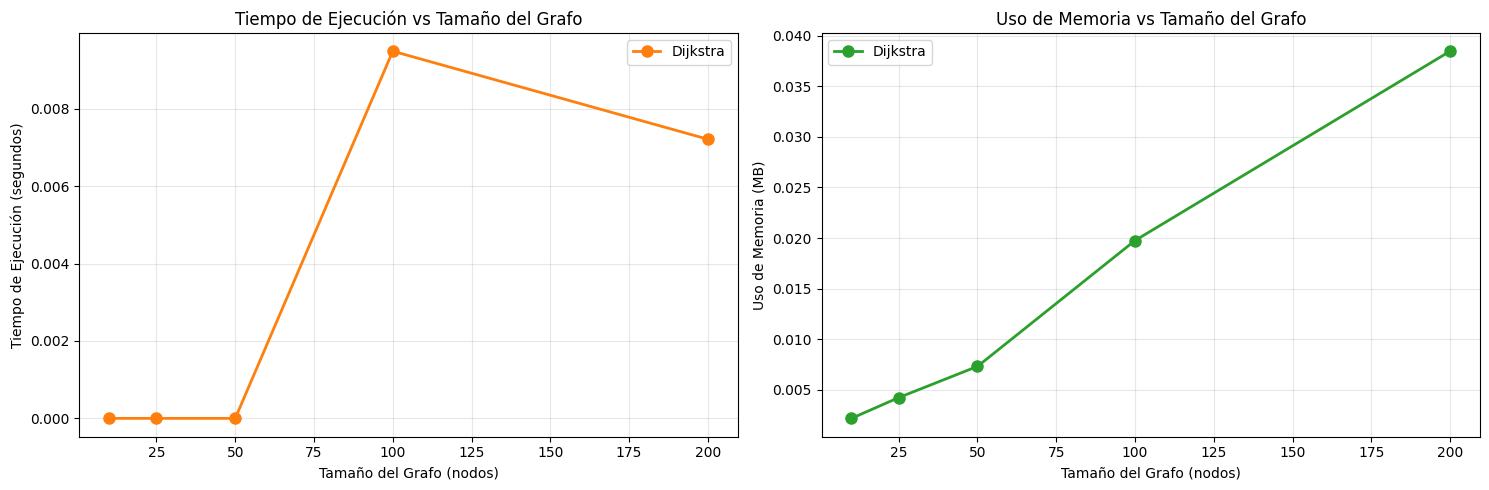


=== RESUMEN ESTADÍSTICO - DIJKSTRA ===
Tiempo promedio: 0.003340 segundos
Memoria promedio: 0.014 MB
Eficiencia (tiempo × memoria): 0.000048


In [18]:
# Visualización de los resultados de rendimiento - Dijkstra

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de tiempo vs tamaño del grafo
ax1.plot(resultados['tamaño'], resultados['dijkstra_tiempo'], 'o-', label='Dijkstra', 
         linewidth=2, markersize=8, color='#ff7f0e')
ax1.set_xlabel('Tamaño del Grafo (nodos)')
ax1.set_ylabel('Tiempo de Ejecución (segundos)')
ax1.set_title('Tiempo de Ejecución vs Tamaño del Grafo')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico de memoria vs tamaño del grafo
ax2.plot(resultados['tamaño'], resultados['dijkstra_memoria'], 'o-', label='Dijkstra', 
         linewidth=2, markersize=8, color='#2ca02c')
ax2.set_xlabel('Tamaño del Grafo (nodos)')
ax2.set_ylabel('Uso de Memoria (MB)')
ax2.set_title('Uso de Memoria vs Tamaño del Grafo')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen estadístico
print("\n=== RESUMEN ESTADÍSTICO - DIJKSTRA ===")
tiempo_promedio = sum(resultados['dijkstra_tiempo']) / len(resultados['dijkstra_tiempo'])
memoria_promedio = sum(resultados['dijkstra_memoria']) / len(resultados['dijkstra_memoria'])
print(f"Tiempo promedio: {tiempo_promedio:.6f} segundos")
print(f"Memoria promedio: {memoria_promedio:.3f} MB")
print(f"Eficiencia (tiempo × memoria): {tiempo_promedio * memoria_promedio:.6f}")